# **Бинарная классификация**
## **Задача**. По данным о пациенте из файла **heart_data.tsv** научиться предсказывать наличие у него сердечно-сосудистого заболевания: артериальной гипертензии, ОНМК, сердечной недостаточности и др.

# 1.2. Модели бинарной классификации

Для решения задачи бинарной классификации можно использовать:

* логистическая регрессия (Logistic Regression),
* метод опорных векторов (SVM),
* деревья решений (Decision Tree),
* метод ближайших соседей (kNN).


Это задача **бинарной классификации**.
Необходимо построить разделяющую поверхность в пространстве признаков, разделяющую пространство на 2 части, каждая из которых соответствует определённому классу: есть заболевание или нет заболевания.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Загрузим необходимые библиотеки

In [2]:
import pandas as pd                  # Импорт библиотеки pandas для работы с табличными данными (DataFrame)
import numpy as np                   # Импорт библиотеки numpy для работы с массивами и числовыми операциями
import seaborn as sns                # Импорт библиотеки seaborn для создания красивых и информативных визуализаций данных
from matplotlib import pyplot as plt # Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций

from sklearn.preprocessing import OneHotEncoder, StandardScaler # Импорт классов для кодирования категориальных признаков и стандартизации данных
from sklearn.model_selection import train_test_split            # Импорт функций для разбиения данных на тренировочную и тестовую выборки

from sklearn.linear_model import LogisticRegression    # Импорт модели логистической регрессии
from sklearn.neighbors import KNeighborsClassifier     # Импорт классификатора K-ближайших соседей
from sklearn.tree import DecisionTreeClassifier        # Импорт классификатора на основе дерева решений
from sklearn.svm import SVC                            # Импорт классификатора на основе метода опорных векторов (SVM)

from sklearn import metrics      # Импорт всего модуля metrics для работы с метриками оценки моделей
from sklearn.metrics import (    # Импорт конкретных функций оценки из подмодуля metrics
    accuracy_score,              # Импорт функции для оценки точности (accuracy) модели, т.е. доли правильно предсказанных примеров
    balanced_accuracy_score,     # Импорт функции для оценки сбалансированной точности, учитывающей классовую неоднородность
    precision_score,             # Импорт функции для вычисления точности (precision)
    recall_score,                # Импорт функции для вычисления полноты (recall)
    confusion_matrix,            # Импорт функции для создания матрицы ошибок (confusion matrix):TN, TP, FN, FP
    multilabel_confusion_matrix, # Импорт функции для создания матрицы ошибок для случаев с многомерной классификацией
    f1_score,                    # Импорт функции для вычисления F1-меры
    roc_auc_score,               # Импорт функции для вычисления AUC-ROC (площадь под кривой приемлемости и ошибок)
    roc_curve,                   # Импорт функции для вычисления координат для построения ROC-кривой
    average_precision_score,     # Импорт функции для вычисления средней точности (average precision)
    precision_recall_curve       # Импорт функции для вычисления и визуализации кривой "точность-полнота" (precision-recall curve)
)

* Загрузим набор данных до кодирования 7-ми категорийных  признаков

In [3]:
heart=pd.read_csv('/content/drive/MyDrive/ML_MED/heart_1.csv')

Для начала будем обучать модель только на числовых признаках с помощью метода **select_dtypes**.

Аргумент **include** обозначает включение, а **exclude** - исключение.

* Отберём столбцы, тип которых принадлежит к **np.number** (**int64**, **float64** и др.)

In [4]:
heart_new = heart.select_dtypes(include=np.number)

* Поместим все целевые признаки, кроме **Артериальной гипертензии** в отдельный список **targets**

In [5]:
targets = ['ОНМК', 'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность','Прочие заболевания сердца']

* Удалим из датасета признаки **targets**

In [6]:
heart_new.drop(columns=targets, inplace=True)


* Разобьем выборки на обучающую и тестовую

* Разобьём датасет на данные для обучения и тестирования методом **train_test_split** библиотеки **Scikit-learn**

Аргументы **train_test_split**:

1. **X_train, X_test, y_train, y_test**:
   - Здесь мы создаем переменные для хранения тренировочных и тестовых наборов данных для признаков и целевой переменной.
   - `X_train` и `X_test` будут соответственно содержать тренировочные и тестовые признаки.
   - `y_train` и `y_test` будут соответственно содержать тренировочные и тестовые метки (целевые значения).


2. **heart_new.drop("Артериальная гипертензия", axis=1)**:
   - Этот участок кода удаляет столбец "Артериальная гипертензия" из DataFrame `heart_new`, так как это наша целевая переменная.
   - Параметр `axis=1` указывает, что следует удалить столбец (а не строку).
   - Таким образом, остается только матрица признаков (X), которая будет передана в функцию `train_test_split`.


3. **heart_new["Артериальная гипертензия"]**:
   - Здесь выбирается столбец "Артериальная гипертензия" из DataFrame `heart_new`.
   - Это наша целевая переменная (y), которая будет передана в функцию `train_test_split`.


4. **test_size=0.2**:
   - Параметр `test_size` задает размер тестовой выборки.
   - Значение `0.2` означает, что 20% от исходных данных будут отведены под тестовую выборку, а 80% - под тренировочную.

5. **random_state=42**:
   - Параметр `random_state` задает начальное значение для генератора случайных чисел.
   - Это позволяет воспроизводить результаты при повторных запусках кода.
   - Использование одного и того же значения `random_state`, например `42`, гарантирует, что разбиение данных будет одинаковым при каждом выполнении.


6. **shuffle=True**:
   - Параметр `shuffle` указывает, что перед разделением данные следует перемешать.
   - Перемешивание данных обычно помогает в получении более надежных и обобщаемых моделей, особенно если данные структурированы или отсортированы каким-либо образом.


7. **stratify=heart_new["Артериальная гипертензия"]**:
   - Параметр `stratify` используется для стратифицированного разбиения данных.
   - Это означает, что разбиение будет выполнено таким образом, чтобы пропорции классов целевой переменной "Артериальная гипертензия" оставались такими же как в исходных данных.
   - Это важно, когда у вас есть несбалансированные данные, чтобы избежать ситуации, когда один из классов может быть недостаточно представлен в тренировочной или тестовой выборке.

В конце объединения всех этих параметров и вызова `train_test_split`, у нас получится разделение данных для тренировочной и тестовой частей, где соотношение между классами целевой переменной будет сохранено, данные будут перемешаны и разделение будет воспроизводимым.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    heart_new.drop("Артериальная гипертензия", axis=1),
    heart_new["Артериальная гипертензия"],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=heart_new["Артериальная гипертензия"]
)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((763, 24), (191, 24), (763,), (191,))

## Метрики качества для задач классификации: точность и специфичность, F1, ROC AUC, PR AUC

Рассмотрим такие метрики, как точность (presicion), специфичность (specificity, true negative rate, TNR), F1-мера (F1-score), ROC AUC и PR AUC для бинарной классификации. Также рассмотрим долю правильных ответов (accuracy), которую часто путают с точностью и сбалансированную точность (balanced accuracy)



**Обозначения:**   
* $\mathbf{y} = (y_1, ..., y_n)$ — правильные ответы
* В задаче бинарной классификации считаем, что $y_i \in \{0, 1\}$ для любого $i \in [1, n]$
* $\hat{\mathbf{y}} = (\hat{y}_1, ..., \hat{y}_n)$ — предсказания меток классов
* В задаче бинарной классификации считаем, что
$$p_1 = p \text{ – вероятность принадлежности к классу } 1$$
$$p_0 = 1 - p \text{ – вероятность принадлежности к классу } 0$$


## Точность, доля правильных ответов (accuracy)

Формула расчета **доли правильных ответов** :

$$\text{accuracy} = \frac{1}{n} \sum_{i = 1}^{n}{1(\hat{y}_i == y_i)}, $$
где $1(x)$ — **индикаторная функция**.



---
Пусть $A ⊆ X$ — выбранное подмножество произвольного множества $X$. Функция $1_A: X → \{0, 1\}$, определенная следующим образом:

\begin{equation*}
1_A(x) =
 \begin{cases}
   1, &\text{$x \in A$}\\
   0, &\text{$x \notin A$},
 \end{cases}
\end{equation*}  

называется **индикатором** множества $A$.

---

$+$ Простая в понимании и интерпретации метрика.  
$-$ Неприменима, когда выборка несбалансированная (если в выборке будет очень мало объектов, представляющих какой-то класс, то даже константная модель (предсказания которой являются константой) покажет достаточно большую долю правильных ответов.

[Реализация в `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

## Точность (presicion) и специфичность (specificity/true negative rate, TNR)


Перед тем как переходить к формулам непосредственно точности и специфичности, введем следующие обозначения, которые лучше всего записать в виде таблицы:

|| $y = 0$ | $y = 1$ |
| :-----------: | :-----------: | :-----------: |
| $\hat{y} = 0$ | True negative (TN) | False negative (FN) |
| $\hat{y} = 1$ | False positive (FP) | True positive (TP) |

В данной таблице приняты следующие обозначения для объектов, попавших в каждую из ячеек:  
* TN — модель правильно классифицировала объект, и он принадлежит классу $0$
* FN — модель неправильно классифицировала объект, присвоила ему класс $0$, хотя он принадлежит классу $1$
* FP — модель неправильно классифицировала объект, присвоила ему класс $1$, хотя он принадлежит классу $0$
* TP — модель правильно классифицировала объект, и он принадлежит классу $1$

В терминах, введенных выше, **точность (precision)** и **специфичность (specificity/TNR)** выглядят следующим образом:

$$ \text{precision} = \frac{TP}{TP + FP} – \text{доля объектов, названных классификатором положительными и при этом действительно являющиеся положительными.}$$
$$ \text{TNR} = \frac{TN}{TN + FP}  
 – \text{показывает, какую долю объектов класса $0$ из всех объектов класса $0$ нашел алгоритм.}$$

Также весьма распространена метрика **полнота (recall)**, которая является «братом-близнецом» специфичности:
$$ \text{recall} = \frac{TP}{TP + FN}  
 – \text{показывает, какую долю объектов класса $1$ из всех объектов класса $1$ нашел алгоритм.}$$  

Визуализировать различие между точностью и полнотой можно следующим образом:

![image.png](https://habrastorage.org/web/38e/9d4/892/38e9d4892d9241ea95e1f56e3ef9124c.png)  
[Рис. 1. Визуальное сравнение точности и полноты](https://en.wikipedia.org/wiki/Precision_and_recall)

**Точность (precision)** демонстрирует способность отличать класс $1$ от других классов, а **полнота (recall)** — способность алгоритма обнаруживать класс $1$ вообще (**специфичность** делает то же самое, что и полнота, только для класса $0$).

Аналогичным образом, через TN, FN, FP и TP, можно ввести и понятие **доли правильных ответов**: $\text{accuracy} = \frac{TP + TN}{TP + FP + TN + FN}.$



$+$ Как точность, так и специфичность и полнота не зависят, в отличие от доли правильных ответов, от соотношения классов, поэтому они применимы и для несбалансированных выборок.  
$-$ На практике обычно не стоит задача оптимизировать какую-то одну из этих метрик, а необходимо найти баланс между ними.

**Реализации:**
* [Точность (precision)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* [Полнота (recall)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)  
* Специфичность (TRN). Реализации именно для специфичности нет, но можно получить из [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) все необходимые значения (TN, TP, FN, и FP)

## balanced_accuracy_score()

Расчет balanced accuracy (сбалансированной точности): средняя полнота для каждого класса, позволяющая оценивать модели при дисбалансе классов

$$Balanced Accuracy = \frac{\sum_{i=1,N}Recall_i}{N}$$

## $F_1$-мера

Как упоминалось ранее, обычно важна не только точность или полнота, но и баланс между ними. Наиболее распространенной метрикой такого баланса является **$F_1$-мера** — среднее гармоническое точности и полноты:  
$$F_1 = \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$  

**$F_1$-мера** достигает максимума при полноте и точности, равных единице, и близка к нулю, если один из аргументов близок к нулю.  
  
[Реализация в `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Существуют и другие варианты соотношений точности и полноты. В целом **$F_1$-мера** — частный случай **$F_\beta-$меры**:  

$$F_\beta = (1 + \beta^2) \frac{\text{precision} \cdot \text{recall}}{\beta^2 \cdot \text{precision} + \text{recall}}$$  

* $\beta > 1$ — больше важна точность
* $\beta < 1$ — больше важна полнота

$+$ $F_1$-мера учитывает распределение классов (т. е. хорошо работает даже в случае несбалансированных выборок).   
$+$ Это одно число, а не два, как с точностью и полнотой.   
$-$ Сложно интерпретируемая.

## ROC AUC



При получении предсказаний алгоритмы выдают вероятности принадлежности к каждому классу.

Для принятия решения, к какому классу все-таки принадлежит конкретный элемент, необходимо выбрать такой порог $T_p$, что $p > T_p \implies $ объект принадлежит к классу $1$, иначе — к классу $0$. Интуитивно кажется, что наиболее оптимальным и логичным является порог $T_p = 0.5$, однако это не всегда так. Чтобы убрать привязку к какому-то конкретному пороговому значению, была введена метрика **ROC AUC** — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve). Кривая ошибок строится в координатах **True Positive Rate (TPR)** и **False Positive Rate (FPR)**:

$$TPR = \frac{TP}{TP + FN}; \:\:\:\:\:\:\:\: FPR = \frac{FP}{FP + TN}.$$  

Как видно из формулы, $TPR$ — это полнота, а $FPR$ — доля объектов класса $0$, которым алгоритм присвоил метку $1$. Кривые ошибок — красная, зеленая и черная кривые на графике ниже:  

![image.png](https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png)  
[Рис. 2. ROC-кривая](https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F)  


В идеальном случае, когда классификатор предсказывает все верно, $FPR = 0,\:\:TPR = 1 \implies ROC\:AUC = 1$. Если классификатор случайно выдает вероятности классов, $ROC\:AUC \rightarrow 0.5$ (поскольку классификатор будет выдавать одинаковое количество TP и FP).  

$+$ Работает с ранжированными прогнозами, т. е. не обязательно использовать хорошо откалиброванные вероятности.  
$+$ Оптимизация данной метрики помогает алгоритму учиться предсказывать два класса, т. е. исключается факт получения константной модели.  
$+$ Для сравнения алгоритмов подходит не только площадь под ROC-кривой, но и сама кривая (чем ROC-кривая выше, тем лучше модель).  
$-$ Плохо работает с сильно несбалансированными выборками.   

[Реализация в `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

## PR AUC

**PR AUC** — площадь (Area Under Curve) под кривой точности и полноты (Precision-Recall curve). Выглядит следующим образом:
![image.png](http://neerc.ifmo.ru/wiki/images/7/79/PR_curve.png)  
[Рис. 5. PR-кривая](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%D1%85_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8&mobileaction=toggle_view_desktop)

**PR AUC** помогает избавиться от проблемы с несбалансированной выборкой, возникающей при использовании ROC AUC. Рассмотрим пример: пусть имеются статьи на математические и гуманитарные темы. Допустим, что математических статей $100$, а гуманитарных — $1 000 000$. В любом случае идеальный алгоритм будет решать задачу с $TPR = 1$  и $FPR = 0$. Рассмотрим теперь «плохой» (что очевидно нам) алгоритм, дающий положительный ответ на $95$ математических и $50000$ нематематических статьях. Такой алгоритм дает $TPR = 0.95$ и $FPR = 0.05$, что крайне близко к показателям идеального алгоритма. В данном случае ROC AUC не может давать адекватную оценку качества работы алгоритма. Однако мы можем сказать, что  
$$TN = 950000,\:\:FP = 50000,\:FN = 5,\:TP = 95 \implies$$
 $$\implies \text{precision} = \frac{95}{95 + 50000} = 0.002\:\:\:\:
 \text{recall} = \frac{95}{95 + 950000} = 0.0001.$$    
 И при таких значениях кажется очевидным, что и при построении PR-кривой площадь под ней окажется очень маленькой, что будет свидетельствовать о том, что алгоритм плохой.   

$+$ Помогает выбрать наиболее подходящий порог классификатора.   
$+$ Хорошо работает и в случае несбалансированной выборки.

Как и в точности и полноте, в случае многоклассовой классификации используются аналогичные виды агрегации.


[Подробнее о взаимосвязи с ROC AUC](http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf)   

[Реализация в `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html)

## Реализация

**confusion_matrix**  —  таблица, которая показывает, насколько хорошо модель классификации различает классы. Она представляет собой двумерную таблицу, где строки соответствуют предсказанным классам, а столбцы — истинным классам. Каждая ячейка таблицы содержит количество экземпляров, которые были классифицированы как предсказанный класс, но на самом деле принадлежат к другому классу.

Функция возвращает четыре значения: количество истинно отрицательных (tn), ложноположительных (fp), ложноотрицательных (fn) и истинно положительных (tp) результатов. Эти значения используются для вычисления специфичности (tn / (tn + fp))

* Создадим **функцию вычисления специфичности** (готовой реализации нет)


In [9]:
def calculate_specificity(true_labels, predictions):
    """Вычисление специфичности для бинарной и многоклассовой классификации
  Аргументы функции:
    true_labels: истинные метки классов
    predictions: предсказанные метки классов
  Результат:
    специфичность и confusion_matrix
    """
    conf_matrix = confusion_matrix(true_labels, predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    specif = (tn / (tn + fp)).round(4)
    return specif, (tn, fp, fn, tp)

* Поместим вычисление нескольких метрик  в отдельную функцию:

In [10]:
  def get_all_metrics(
    true_labels,
    predictions,
    probabilities,
    print_metrics=False,
    **kwargs,
):
    """Подсчёт и вывод всех метрик
  Аргументы функции:
    true_labels: истинные метки классов
    predictions: предсказания (метки классов)
    probabilities: предсказания (вероятности принадлежности каждого объекта к каждому классу)
    print_metrics: если True, то печатает получившиеся метрики
    **kwargs: специальный синтаксис для сборки всех дополнительных именованных аргументов в один словарь
  Возвращает:
    словарь, ключи которого -- названия метрик точности, значения -- значения метрик точности
    """

    kwargs_precision_recall_f1_pr_auc = dict()
    kwargs_roc_auc = dict()

    """Создаются два пустых словаря (`dict` — ассоциативный массив или словарь)
    1. kwargs_precision_recall_f1_pr_auc = dict():
    Создается пустой словарь, который будет использован для передачи дополнительных аргументов
    (keyword arguments — `kwargs`) в функции, связанные с вычислением или визуализацией метрик, таких как
     Precision, Recall, F1 Score, PR AUC
    2. kwargs_roc_auc = dict():
    Создается пустой словарь, в который будут добавлены дополнительные параметры для анализа, связанного
    с ROC  кривой и площадью под ней
    """
    probabilities = probabilities[:, 1]
    true_predicted_labels_precision_recall_f1 = {
        "y_true": true_labels,
        "y_pred": predictions,
    }
    true_predicted_labels_pr_auc = {
        "y_true": true_labels,
        "y_score": probabilities,
    }

    """
    probabilities = probabilities[:, 1]: извлекает вероятности для позитивного класса (второго столбца) из массива предсказаний probabilities
    true_predicted_labels_precision_recall_f1: создаёт словарь, содержащий:
         "y_true": истинные метки классов (true_labels); "y_pred": предсказанные метки классов (predictions).

    true_predicted_labels_pr_auc: создаёт словарь, содержащий:
    "y_true": истинные метки классов (true_labels); "y_score": вероятности, предсказанные моделями (probabilities).
    """

    accuracy = accuracy_score(true_labels, predictions).round(4)
    balanced_accuracy=balanced_accuracy_score(true_labels, predictions).round(4)
    precision = precision_score(**true_predicted_labels_precision_recall_f1, **kwargs_precision_recall_f1_pr_auc).round(4)
    recall = recall_score(**true_predicted_labels_precision_recall_f1, **kwargs_precision_recall_f1_pr_auc).round(4)
    f1 = f1_score(**true_predicted_labels_precision_recall_f1, **kwargs_precision_recall_f1_pr_auc).round(4)

    roc_auc = roc_auc_score(true_labels, probabilities, **kwargs_roc_auc).round(4)
    pr_auc = average_precision_score(**true_predicted_labels_pr_auc, **kwargs_precision_recall_f1_pr_auc).round(4)

    specificity, conf_matrix = calculate_specificity(true_labels, predictions)


    tn, fp, fn, tp = conf_matrix

    if print_metrics:
        print(
            "Accuracy = {}\nBalanced_accuracy={}\nPrecision = {}\nRecall = {}\nF1_score = {}\nROC AUC = {}\nPR AUC = {}\nSpecificity = {}".format(
                accuracy, balanced_accuracy, precision, recall, f1, roc_auc, pr_auc, specificity
            )
        )


    return {
        "Accuracy": accuracy,
        "Balanced accuracy": balanced_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1_score": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Specificity": specificity
    }

Поскольку необходимо сравнивать несколько моделей, напишем отдельную функцию для обучения и тестирования модели. Также эта функция будет вычислять и все указанные выше метрики.

In [11]:
def model_train_test(X_train, y_train, X_test, y_test, model, **kwargs):
    """Обучение и тестирование модели на обучающей и тестовой выборке соответственно.
    Аргументы функции:
    X_train: объекты обучающей выборки
    y_train: значения целевой переменной обучающей выборки
    X_test: объекты тестовой выборки
    y_test: значения целевой переменной тестовой выборки
    model: модель, которая обучается и тестируется
    Функция возвращает предсказания - классы и вероятности принадлежности к каждому классу, все метрики
    """
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)
    """
    Метод predict используется для получения окончательных предсказаний класса для данного набора данных.
    Возвращает классы (метки) для объектов, исходя из решения модели. Для бинарной классификации возможные значения могут быть 0 или 1
    """
    if isinstance(model, LogisticRegression):
        importance = model.coef_[0]
    elif isinstance(model, DecisionTreeClassifier):
        importance = model.feature_importances_
    else:
         importance = None
    """
    Функция isinstance() в Python проверяет, является ли объект экземпляром указанного класса или кортежа классов.
    Возвращает True, если объект соответствует заданному типу, и False в противном случае.
    В нашем случае -это проверка, является ли объект model экземпляром класса LogisticRegression или DecisionTreeClassifier
    Логистическая регрессия:
    classifier.coef_ - атрибут модели, который содержит коэффициенты (веса) перед каждым признаком.
    Индекс [0] в classifier.coef_[0] используется для доступа к коэффициентам первого класса.
    Следовательно, код importance = classifier.coef_[0] присваивает переменной importance массив коэффициентов,
    которые модель использует для принятия решений о принадлежности нового наблюдения к первому классу.
    """
    print(str(model), end="\n\n")

    all_metrics = get_all_metrics(
        y_test,
        pred,
        proba,
        print_metrics=True,
        **kwargs,
    )
    return pred, proba, importance, all_metrics

### Сравнение алгоритмов

Перейдем к непосредственному сравнению моделей. В задаче бинарной классификации будем сравнивать логистическую регрессию, решающее дерево, метод k-ближайших соседей и метод опорных векторов.  

In [13]:
pred_logreg, proba_logreg, importance_logreg, all_metrics_logreg = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    LogisticRegression(random_state=42, max_iter=500)
)

LogisticRegression(max_iter=500, random_state=42)

Accuracy = 0.7487
Balanced_accuracy=0.7511
Precision = 0.7071
Recall = 0.7865
F1_score = 0.7447
ROC AUC = 0.8066
PR AUC = 0.7607
Specificity = 0.7157


In [ ]:
pred_dt, proba_dt, importance_dt, all_metrics_dt = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    DecisionTreeClassifier(random_state=42)
)

DecisionTreeClassifier(random_state=42)

Accuracy = 0.6649
Balanced_accuracy=0.6662
Precision = 0.6289
Recall = 0.6854
F1_score = 0.6559
ROC AUC = 0.6662
PR AUC = 0.5776
Specificity = 0.6471


In [ ]:
pred_knn, proba_knn, importance_knn, all_metrics_knn = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    KNeighborsClassifier()
)

KNeighborsClassifier()

Accuracy = 0.5812
Balanced_accuracy=0.5778
Precision = 0.5529
Recall = 0.5281
F1_score = 0.5402
ROC AUC = 0.6056
PR AUC = 0.5671
Specificity = 0.6275


In [ ]:
pred_svm, proba_svm, importance_svm, all_metrics_svm = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    SVC(probability=True)
)

SVC(probability=True)

Accuracy = 0.555
Balanced_accuracy=0.5346
Precision = 0.5526
Recall = 0.236
F1_score = 0.3307
ROC AUC = 0.6115
PR AUC = 0.5687
Specificity = 0.8333


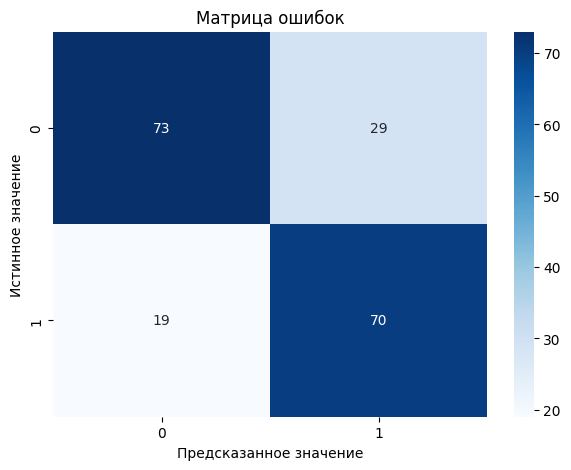

In [ ]:
#Строим матрицу ошибок для модели
confus_matrix = metrics.confusion_matrix(y_test, pred_logreg)
#Визуализируем матрицу ошибок
fig, axes = plt.subplots(figsize=(7, 5))
#Строим тепловую карту для матрицы ошибок
sns.heatmap(confus_matrix, annot=True, fmt='', cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes.set_title('Матрица ошибок')
axes.set_xlabel('Предсказанное значение')
axes.set_ylabel('Истинное значение');

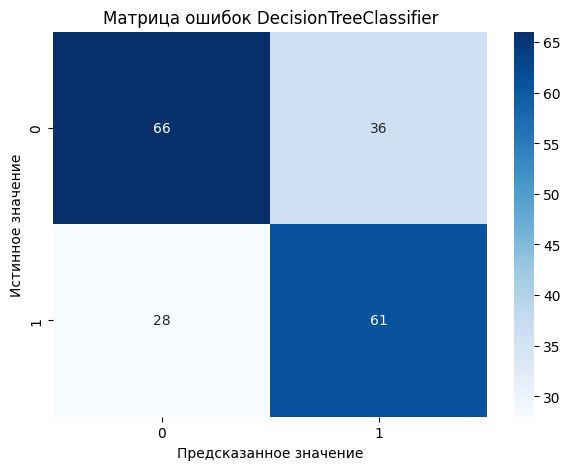

In [ ]:
confus_matrix = metrics.confusion_matrix(y_test, pred_dt)
fig, axes = plt.subplots(figsize=(7, 5))
sns.heatmap(confus_matrix, annot=True, fmt='', cmap='Blues')
axes.set_title('Матрица ошибок DecisionTreeClassifier')
axes.set_xlabel('Предсказанное значение')
axes.set_ylabel('Истинное значение');

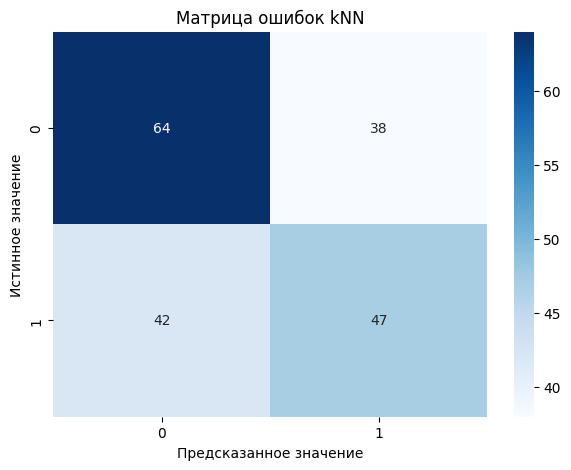

In [ ]:
confus_matrix = metrics.confusion_matrix(y_test, pred_knn)
fig, axes = plt.subplots(figsize=(7, 5))
sns.heatmap(confus_matrix, annot=True, fmt='', cmap='Blues')
axes.set_title('Матрица ошибок kNN')
axes.set_xlabel('Предсказанное значение')
axes.set_ylabel('Истинное значение');

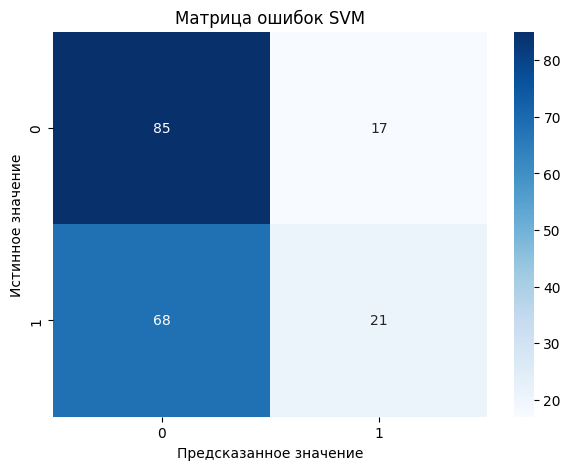

In [ ]:
confus_matrix = metrics.confusion_matrix(y_test, pred_svm)
fig, axes = plt.subplots(figsize=(7, 5))
sns.heatmap(confus_matrix, annot=True, fmt='', cmap='Blues')
axes.set_title('Матрица ошибок SVM')
axes.set_xlabel('Предсказанное значение')
axes.set_ylabel('Истинное значение');

* Сравним не только ROC AUC и PR AUC, но и ROC- и PR-кривые. Для их визуализации будем использовать функцию, приведенную ниже:

In [ ]:
def plot_roc_pr_curves(true_labels, algorithms):
    """Отрисовка ROC- и PR-кривых.
    Аргументы функции:
    true_labels: истинные метки классов
    algorithms: словарь формата {название_алгоритма: вероятности_принадлежности_к_каждому_классу}
    """
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    ax[0].set_title("ROC-curve", fontsize=20)
    ax[1].set_title("PR-curve", fontsize=20)

    for alg_name, probabilities in algorithms.items():
        fpr, tpr, _ = roc_curve(true_labels, probabilities[:, 1])
        precisions, recalls, _ = precision_recall_curve(true_labels, probabilities[:, 1])

        ax[0].plot(
            fpr,
            tpr,
            label="{} (ROC AUC = {})".format(
                alg_name,
                round(
                    roc_auc_score(true_labels, probabilities[:, 1]),
                    3
                )
            )
        )
        ax[1].plot(
            recalls,
            precisions,
            label="{} (PR AUC = {})".format(
                alg_name,
                round(
                    average_precision_score(true_labels, probabilities[:, 1]),
                    3
                )
            )
        )

    ax[0].legend(fontsize=14)
    ax[0].set_xlabel("False positive rate", fontsize=16)
    ax[0].set_ylabel("True positive rate", fontsize=16)

    ax[1].legend(fontsize=14)
    ax[1].set_xlabel("Recall", fontsize=16)
    ax[1].set_ylabel("Precision", fontsize=16)
    plt.show()

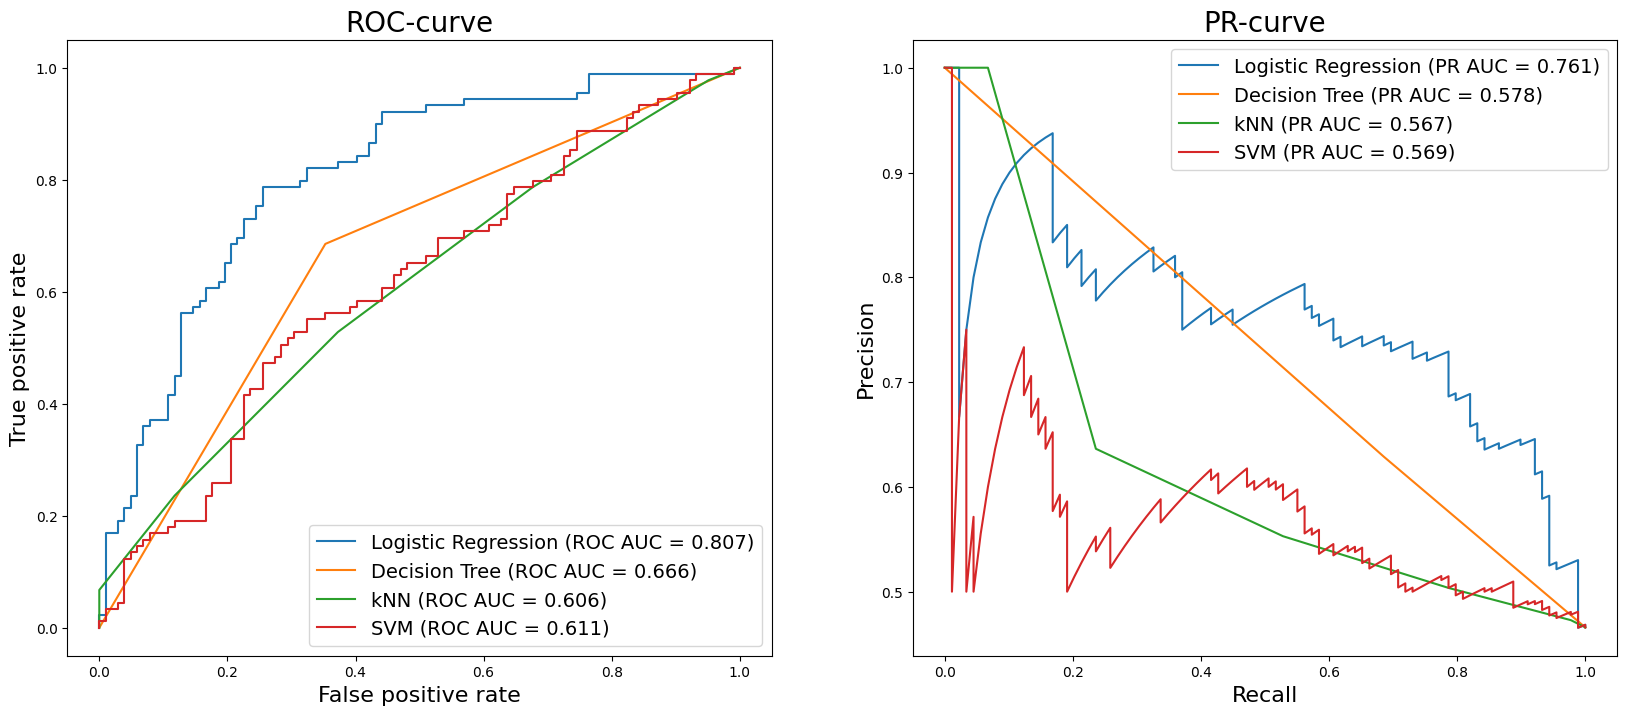

In [ ]:
plot_roc_pr_curves(
    y_test,
    {
        "Logistic Regression": proba_logreg,
        "Decision Tree": proba_dt,
        "kNN": proba_knn,
        "SVM": proba_svm,
    }
)

* Сагрегируем все метрики моделей

In [ ]:
ans_df = pd.DataFrame(
    [all_metrics_logreg, all_metrics_dt, all_metrics_knn, all_metrics_svm],
    index=["Logistic Regression", "Decision Tree", "kNN", "SVM"]
)
ans_df

,Accuracy,Balanced accuracy,Precision,Recall,F1_score,ROC AUC,PR AUC,Specificity
Logistic Regression,0.7487,0.7511,0.7071,0.7865,0.7447,0.8066,0.7607,0.7157
Decision Tree,0.6649,0.6662,0.6289,0.6854,0.6559,0.6662,0.5776,0.6471
kNN,0.5812,0.5778,0.5529,0.5281,0.5402,0.6056,0.5671,0.6275
SVM,0.5550,0.5346,0.5526,0.2360,0.3307,0.6115,0.5687,0.8333


* Для каждой метрики выведем список моделей по убыванию их качества

In [ ]:
for metric in ans_df.columns:
    sorted_ans_df = ans_df.sort_values(by=metric, ascending=False)
    print(
        "{}:{}{}".format(
            metric,
            " " * (20 - len(metric)),
            sorted_ans_df.index.tolist()
        )
    )

Accuracy:            ['Logistic Regression', 'Decision Tree', 'kNN', 'SVM']
Balanced accuracy:   ['Logistic Regression', 'Decision Tree', 'kNN', 'SVM']
Precision:           ['Logistic Regression', 'Decision Tree', 'kNN', 'SVM']
Recall:              ['Logistic Regression', 'Decision Tree', 'kNN', 'SVM']
F1_score:            ['Logistic Regression', 'Decision Tree', 'kNN', 'SVM']
ROC AUC:             ['Logistic Regression', 'Decision Tree', 'SVM', 'kNN']
PR AUC:              ['Logistic Regression', 'Decision Tree', 'SVM', 'kNN']
Specificity:         ['SVM', 'Logistic Regression', 'Decision Tree', 'kNN']


Согласно большинству метрик наилучшим алгоритмом оказалась логистическая регрессия.

* Метод, который упорядочивает и визуализирует коэффициенты регрессии для каждого признака

In [ ]:
# Определим функцию plot_imp, которая принимает два аргумента: arteria и importance.
# Аргументы функции - это списки или массивы, которые будут использоваться для построения графика:
def plot_imp(arteria, importance):
# Создадим список order, который содержит индексы элементов массива importance, упорядоченных по убыванию.
# Функция argsort из библиотеки NumPy используется для сортировки массивов:
    order = np.argsort(importance)
# Присвом переменным arteria и importance новый список, который содержит элементы исходного списка arteria,importance
# упорядоченные в соответствии с порядком, определенным в order:
    arteria = arteria[order]
    importance = importance[order]

    for idx, val in enumerate(importance):
        print(f'{arteria[idx]:40} {val:.4f}')
    plt.figure(figsize=(4, np.ceil(len(arteria) / 4)))

    plt.barh(arteria, importance) # рисует гистограмму
    plt.show() # отображает график на экране

* Цикл for перебирает элементы массива **importance** и печатает их значения вместе с соответствующими значениями из списка **arteria**. Формат строки **%.4f** указывает на то, что дробная часть числа будет округлена до четырех знаков после запятой. Функция **enumerate** используется для получения индекса и значения элемента в итерируемом объекте, таком как список или кортеж. В данном контексте, **enumerate(importance)**  возвращает кортеж пар (индекс, значение), где индекс - это позиция элемента в списке **importance**, а значение - само значение элемента.
Число 40 в формате строки `{arteria[idx]:40}` означает, что значение из списка **arteria** будет выведено в формате строки, где максимальная ширина поля составляет 40 символов. Это делается для того, чтобы все строки были выровнены по левому краю и имели одинаковую ширину.

* plt.figure(figsize=(4, np.ceil(len(arteria) / 4)))

Этот оператор создает новый график с размерами, определенными в **figsize**. Размер определяется как (ширина, высота), где ширина равна 4, а высота вычисляется как ближайшее целое число к отношению длины списка **arteria** к 4. Функция **np.ceil** используется для округления числа вверх до ближайшего целого.



### Вклад признаков в предсказание

Модель **LogisticRegression** является линейной и использует весовые коэффициенты для определения важности признаков.

Коэффициенты модели (**Coefficients**):
Для линейных моделей такие как логистическая регрессия, важность признаков можно определить исходя из абсолютных значений коэффициентов. Коэффициенты показывают, насколько сильно каждый признак влияет на предсказание.

Для **дерева решений** важность признаков вычисляется на основе того, насколько каждый признак уменьшает неопределенность (или импурность) в узлах дерева.

Встроенная важность признаков:
В моделях на основе дерева решений, таких как DecisionTreeClassifier, библиотека scikit-learn предоставляет встроенный метод **feature_importances_**, который возвращает значения важности для каждого признака.

Для обеих моделей, можно также применить вышеупомянутые методы, такие как:

**Permutation Importance** (Переменная важность): метод случайной перестановки значений признаков и измерения снижения метрик модели.
Удаление признаков (**Feature Removal**): поочерёдное удаление каждого признака и измерение изменения производительности модели.

In [ ]:
heart_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Пол                                     954 non-null    int64  
 1   Образование                             954 non-null    int64  
 2   Работа                                  954 non-null    int64  
 3   Выход на пенсию                         954 non-null    int64  
 4   Прекращение работы по болезни           954 non-null    int64  
 5   Сахарный диабет                         954 non-null    int64  
 6   Гепатит                                 954 non-null    int64  
 7   Онкология                               954 non-null    int64  
 8   Хроническое заболевание легких          954 non-null    int64  
 9   Бронхиальная астма                      954 non-null    int64  
 10  Туберкулез легких                       954 non-null    int64 

In [ ]:
heart_new.drop("Артериальная гипертензия", axis=1, inplace=True)

Религия, клубы                           -0.6765
Гепатит                                  -0.2494
Образование                              -0.2352
Работа                                   -0.1913
Время пробуждения                        -0.1694
Травмы за год                            -0.1097
Время засыпания                          -0.0603
Возраст курения                          0.0004
Возраст алког                            0.0021
Сигарет в день                           0.0093
Спорт, клубы                             0.0489
Сон после обеда                          0.0620
Прекращение работы по болезни            0.0806
Частота пасс кур                         0.0826
Продолжительность сна                    0.0926
Туберкулез легких                        0.1658
Бронхиальная астма                       0.2939
Пол                                      0.3431
Переломы                                 0.3639
Выход на пенсию                          0.4377
Хроническое заболевание легких   

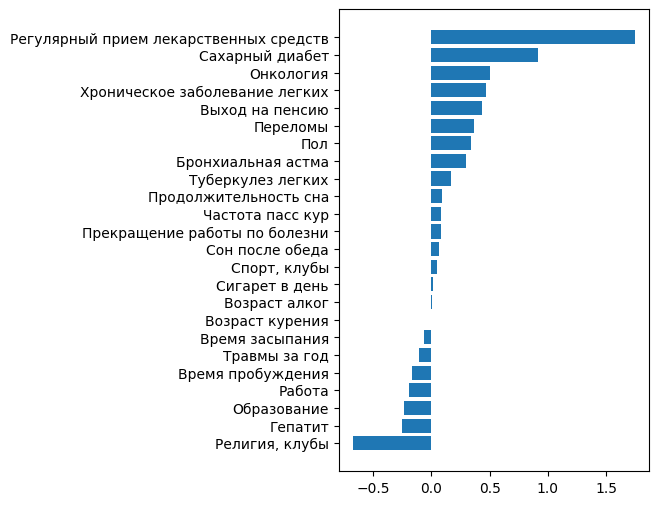

In [ ]:
arteria = heart_new.columns
plot_imp(arteria, importance_logreg)

* Выведем абсолютный вклад признаков в предсказание

Возраст курения                          0.0004
Возраст алког                            0.0021
Сигарет в день                           0.0093
Спорт, клубы                             0.0489
Время засыпания                          0.0603
Сон после обеда                          0.0620
Прекращение работы по болезни            0.0806
Частота пасс кур                         0.0826
Продолжительность сна                    0.0926
Травмы за год                            0.1097
Туберкулез легких                        0.1658
Время пробуждения                        0.1694
Работа                                   0.1913
Образование                              0.2352
Гепатит                                  0.2494
Бронхиальная астма                       0.2939
Пол                                      0.3431
Переломы                                 0.3639
Выход на пенсию                          0.4377
Хроническое заболевание легких           0.4678
Онкология                               

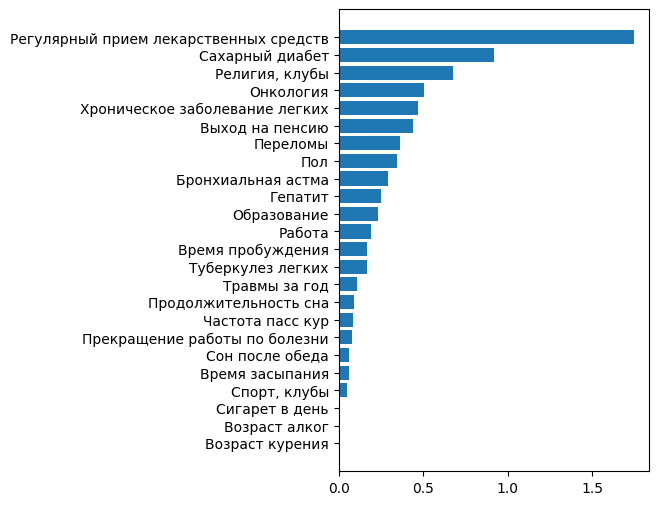

In [ ]:
plot_imp(arteria, np.abs(importance_logreg))

Туберкулез легких                        0.0000
Бронхиальная астма                       0.0018
Онкология                                0.0026
Травмы за год                            0.0029
Религия, клубы                           0.0055
Прекращение работы по болезни            0.0063
Хроническое заболевание легких           0.0149
Спорт, клубы                             0.0175
Выход на пенсию                          0.0181
Сон после обеда                          0.0229
Пол                                      0.0229
Работа                                   0.0237
Гепатит                                  0.0245
Сахарный диабет                          0.0300
Переломы                                 0.0357
Частота пасс кур                         0.0523
Сигарет в день                           0.0549
Время пробуждения                        0.0633
Образование                              0.0692
Возраст курения                          0.0753
Возраст алког                           

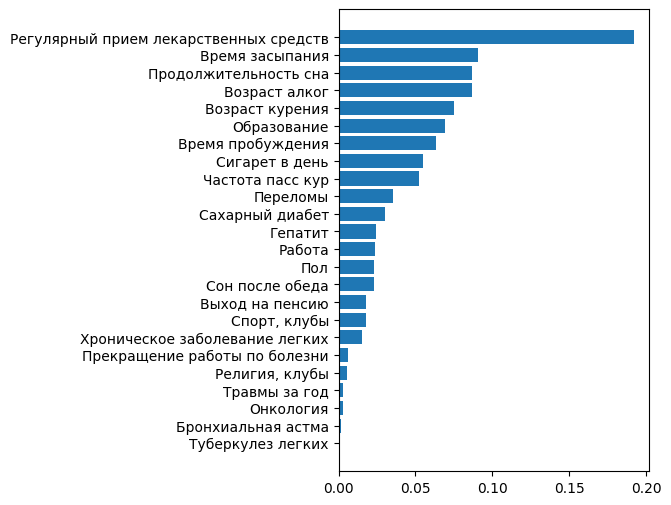

In [ ]:
plot_imp(arteria, importance_dt)



---



* Добавим в модель признаки, которые были удалены ранее.

Закодируем все признаки не относящиеся к **np.number** следующим образом: если значение признака встречалось n раз, то вместо значения этого признака будет использоваться число n.

In [ ]:
for n in heart.select_dtypes(exclude=np.number):
    heart[f'{n}'] = heart[n].map(heart[n].value_counts())

In [ ]:
heart.head()

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Работа,Выход на пенсию,Прекращение работы по болезни,...,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Продолжительность сна
0,0,563,930,898,804,3,138,1,0,0,...,6,0,0,0,0,0,0,0,0,8
1,1,125,930,898,804,5,225,0,0,0,...,4,1,0,0,1,1,0,0,0,4
2,1,563,930,898,804,5,225,0,0,0,...,7,0,0,0,0,0,0,0,0,8
3,0,563,930,898,86,3,138,1,0,0,...,7,0,0,0,1,0,0,0,0,8
4,1,563,930,898,804,3,72,0,0,1,...,6,0,0,0,1,0,1,1,0,7


In [ ]:
targets = ['ОНМК', 'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность','Прочие заболевания сердца']

* Удалим из датасета признаки **targets**

In [ ]:
heart.drop(columns=targets, inplace=True)


* Разобьем выборки на обучающую и тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    heart.drop("Артериальная гипертензия", axis=1),
    heart["Артериальная гипертензия"],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=heart["Артериальная гипертензия"]
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((763, 31), (191, 31), (763,), (191,))

### Масштабирование признаков

**StandardScaler** приводит матожидание всех признаков к нулю, стандартное отклонение к единице.
$$z=\frac{X-\mu}{\sigma}$$

 Другие методы масштабирования [здесь](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).


Масштабирование необходимо производить с учетом разбиения на обучающую и тестовую выборки.

In [ ]:
# Нормализация
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape, X_test.shape, X_train_scaled.shape, X_test_scaled.shape

((763, 31), (191, 31), (763, 31), (191, 31))

### Сравнение алгоритмов

Перейдем к непосредственному сравнению моделей. В задаче бинарной классификации будем сравнивать логистическую регрессию, решающее дерево, метод k-ближайших соседей и метод опорных векторов.  

In [ ]:
pred_logreg, proba_logreg, importance_logreg, all_metrics_logreg = model_train_test(
    X_train_scaled, y_train.values,
    X_test_scaled, y_test.values,
    LogisticRegression(random_state=42)
)

LogisticRegression(random_state=42)

Accuracy = 0.7435
Balanced_accuracy=0.7462
Precision = 0.7
Recall = 0.7865
F1_score = 0.7407
ROC AUC = 0.8023
PR AUC = 0.7584
Specificity = 0.7059


In [ ]:
pred_dt, proba_dt, importance_dt, all_metrics_dt = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    DecisionTreeClassifier(random_state=42)
)

DecisionTreeClassifier(random_state=42)

Accuracy = 0.6754
Balanced_accuracy=0.6767
Precision = 0.6392
Recall = 0.6966
F1_score = 0.6667
ROC AUC = 0.6767
PR AUC = 0.5866
Specificity = 0.6569


In [ ]:
pred_knn, proba_knn, importance_knn, all_metrics_knn = model_train_test(
    X_train_scaled, y_train.values,
    X_test_scaled, y_test.values,
    KNeighborsClassifier()
)

KNeighborsClassifier()

Accuracy = 0.6649
Balanced_accuracy=0.6612
Precision = 0.6506
Recall = 0.6067
F1_score = 0.6279
ROC AUC = 0.69
PR AUC = 0.6113
Specificity = 0.7157


In [ ]:
pred_svm, proba_svm, importance_svm, all_metrics_svm = model_train_test(
    X_train_scaled, y_train.values,
    X_test_scaled, y_test.values,
    SVC(probability=True)
)

SVC(probability=True)

Accuracy = 0.6911
Balanced_accuracy=0.6936
Precision = 0.65
Recall = 0.7303
F1_score = 0.6878
ROC AUC = 0.7865
PR AUC = 0.7424
Specificity = 0.6569


Добавив в модель больше информации, мы снизили качество на тестовой выборке


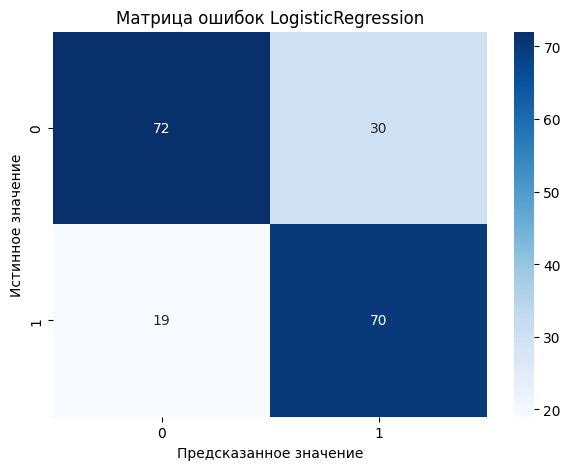

In [ ]:
#Строим матрицу ошибок для модели
confus_matrix = metrics.confusion_matrix(y_test, pred_logreg)
#Визуализируем матрицу ошибок
fig, axes = plt.subplots(figsize=(7, 5))
#Строим тепловую карту для матрицы ошибок
sns.heatmap(confus_matrix, annot=True, fmt='', cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes.set_title('Матрица ошибок LogisticRegression')
axes.set_xlabel('Предсказанное значение')
axes.set_ylabel('Истинное значение');

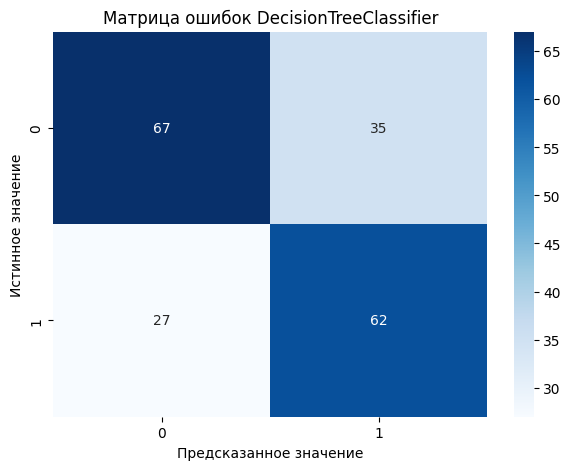

In [ ]:
confus_matrix = metrics.confusion_matrix(y_test, pred_dt)
fig, axes = plt.subplots(figsize=(7, 5))
sns.heatmap(confus_matrix, annot=True, fmt='', cmap='Blues')
axes.set_title('Матрица ошибок DecisionTreeClassifier')
axes.set_xlabel('Предсказанное значение')
axes.set_ylabel('Истинное значение');

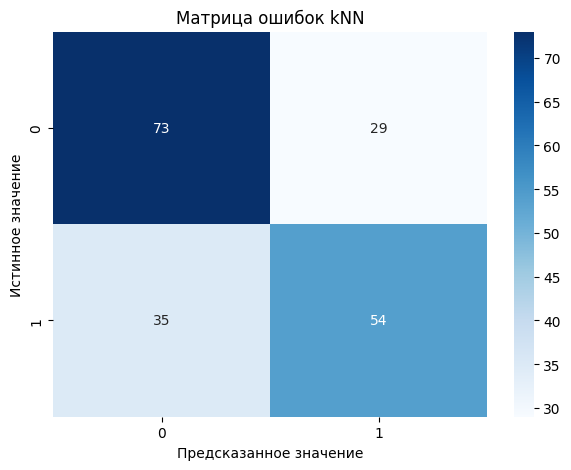

In [ ]:
confus_matrix = metrics.confusion_matrix(y_test, pred_knn)
fig, axes = plt.subplots(figsize=(7, 5))
sns.heatmap(confus_matrix, annot=True, fmt='', cmap='Blues')
axes.set_title('Матрица ошибок kNN')
axes.set_xlabel('Предсказанное значение')
axes.set_ylabel('Истинное значение');

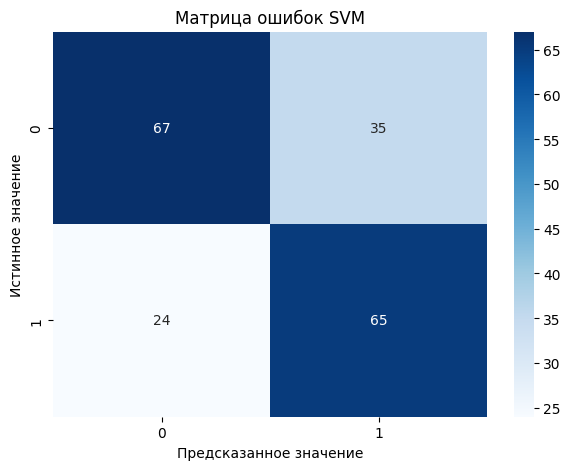

In [ ]:
confus_matrix = metrics.confusion_matrix(y_test, pred_svm)
fig, axes = plt.subplots(figsize=(7, 5))
sns.heatmap(confus_matrix, annot=True, fmt='', cmap='Blues')
axes.set_title('Матрица ошибок SVM')
axes.set_xlabel('Предсказанное значение')
axes.set_ylabel('Истинное значение');

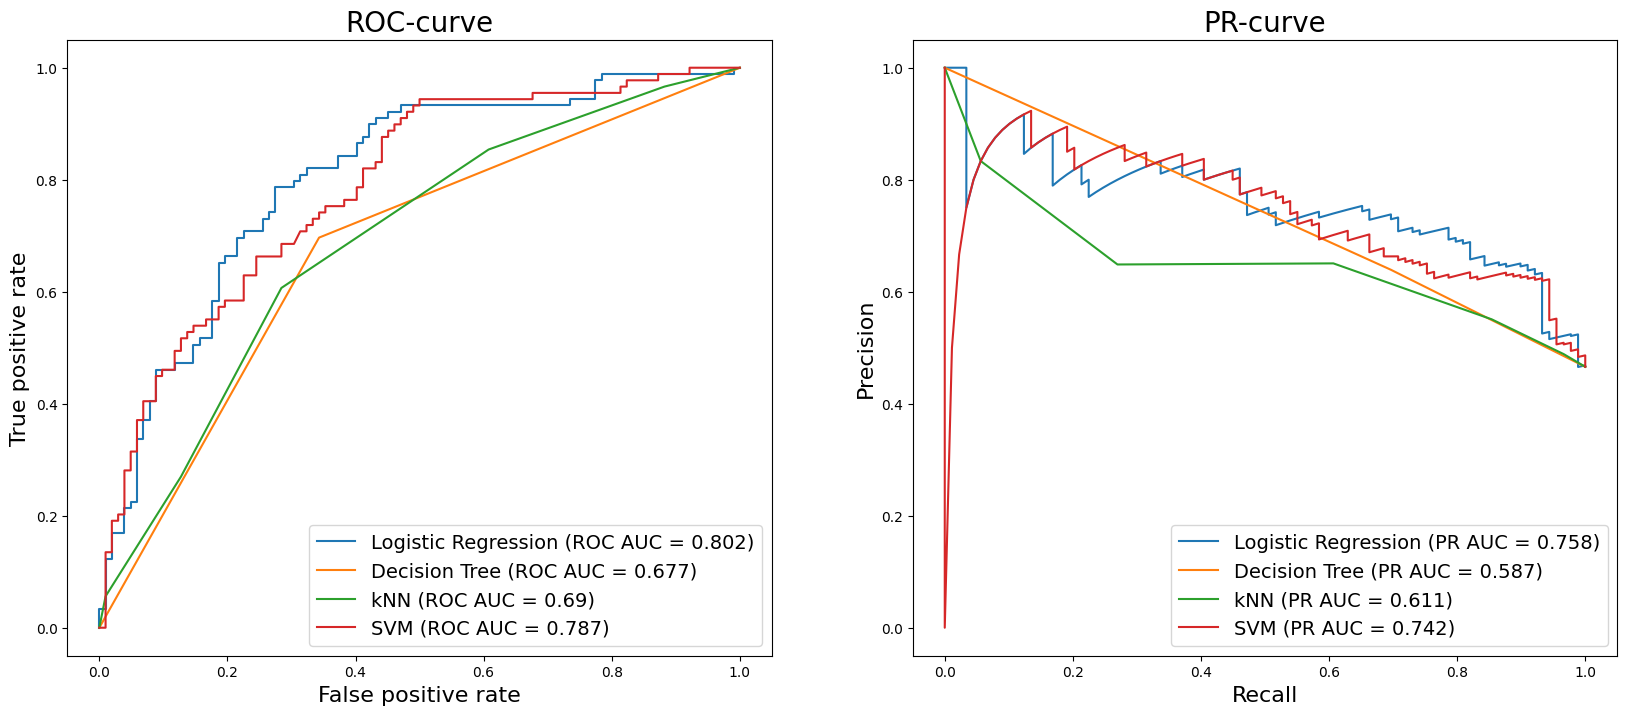

In [ ]:
plot_roc_pr_curves(
    y_test,
    {
        "Logistic Regression": proba_logreg,
        "Decision Tree": proba_dt,
        "kNN": proba_knn,
        "SVM": proba_svm,
    }
)

* Сагрегируем все метрики моделей

In [ ]:
ans_df = pd.DataFrame(
    [all_metrics_logreg, all_metrics_dt, all_metrics_knn, all_metrics_svm],
    index=["Logistic Regression", "Decision Tree", "kNN", "SVM"]
)
ans_df

,Accuracy,Balanced accuracy,Precision,Recall,F1_score,ROC AUC,PR AUC,Specificity
Logistic Regression,0.7435,0.7462,0.7000,0.7865,0.7407,0.8023,0.7584,0.7059
Decision Tree,0.6754,0.6767,0.6392,0.6966,0.6667,0.6767,0.5866,0.6569
kNN,0.6649,0.6612,0.6506,0.6067,0.6279,0.6900,0.6113,0.7157
SVM,0.6911,0.6936,0.6500,0.7303,0.6878,0.7865,0.7424,0.6569


* Для каждой метрики выведем список моделей по убыванию их качества

In [ ]:
for metric in ans_df.columns:
    sorted_ans_df = ans_df.sort_values(by=metric, ascending=False)
    print(
        "{}:{}{}".format(
            metric,
            " " * (20 - len(metric)),
            sorted_ans_df.index.tolist()
        )
    )

Accuracy:            ['Logistic Regression', 'SVM', 'Decision Tree', 'kNN']
Balanced accuracy:   ['Logistic Regression', 'SVM', 'Decision Tree', 'kNN']
Precision:           ['Logistic Regression', 'kNN', 'SVM', 'Decision Tree']
Recall:              ['Logistic Regression', 'SVM', 'Decision Tree', 'kNN']
F1_score:            ['Logistic Regression', 'SVM', 'Decision Tree', 'kNN']
ROC AUC:             ['Logistic Regression', 'SVM', 'kNN', 'Decision Tree']
PR AUC:              ['Logistic Regression', 'SVM', 'kNN', 'Decision Tree']
Specificity:         ['kNN', 'Logistic Regression', 'Decision Tree', 'SVM']


Снова наилучшим алгоритмом в данном случае оказалась логистическая регрессия.   

### Вклад признаков в предсказание

In [ ]:
heart.drop("Артериальная гипертензия", axis=1, inplace=True)

Статус Курения                           -0.2539
Время засыпания                          -0.1632
Образование                              -0.1348
Религия, клубы                           -0.1348
Время пробуждения                        -0.1240
Гепатит                                  -0.0965
Профессия                                -0.0897
Работа                                   -0.0885
Семья                                    -0.0767
Этнос                                    -0.0371
Травмы за год                            -0.0285
Алкоголь                                 -0.0222
Религия                                  -0.0121
Продолжительность сна                    0.0104
Национальность                           0.0112
Спорт, клубы                             0.0189
Сон после обеда                          0.0195
Прекращение работы по болезни            0.0212
Туберкулез легких                        0.0260
Возраст алког                            0.0427
Бронхиальная астма         

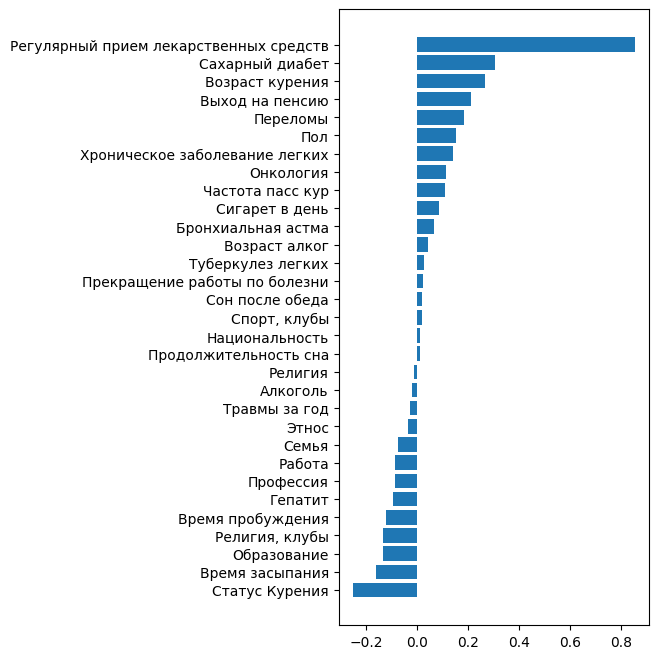

Продолжительность сна                    0.0104
Национальность                           0.0112
Религия                                  0.0121
Спорт, клубы                             0.0189
Сон после обеда                          0.0195
Прекращение работы по болезни            0.0212
Алкоголь                                 0.0222
Туберкулез легких                        0.0260
Травмы за год                            0.0285
Этнос                                    0.0371
Возраст алког                            0.0427
Бронхиальная астма                       0.0663
Семья                                    0.0767
Сигарет в день                           0.0842
Работа                                   0.0885
Профессия                                0.0897
Гепатит                                  0.0965
Частота пасс кур                         0.1063
Онкология                                0.1135
Время пробуждения                        0.1240
Религия, клубы                          

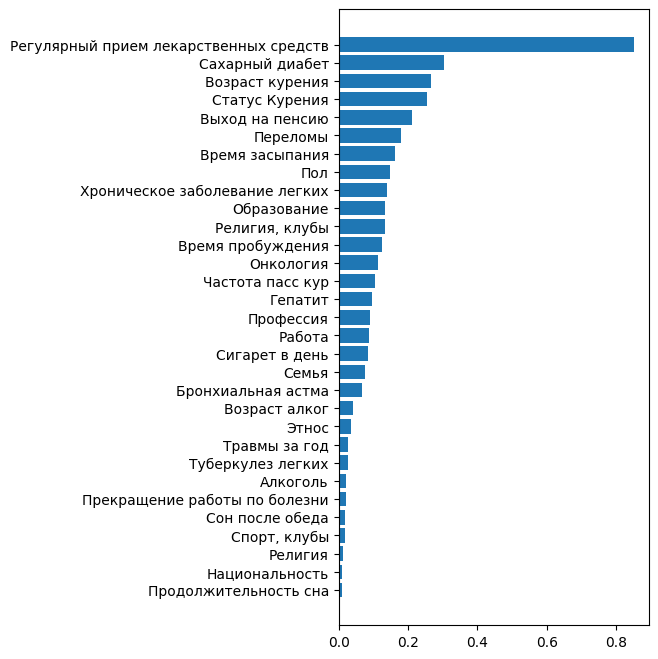

In [ ]:
arteria1=heart.columns
plot_imp(arteria1, importance_logreg)
plot_imp(arteria1, np.abs(importance_logreg))

Этнос                                    0.0000
Спорт, клубы                             0.0014
Травмы за год                            0.0015
Бронхиальная астма                       0.0035
Религия, клубы                           0.0045
Туберкулез легких                        0.0049
Хроническое заболевание легких           0.0075
Работа                                   0.0085
Онкология                                0.0086
Национальность                           0.0102
Статус Курения                           0.0102
Прекращение работы по болезни            0.0112
Пол                                      0.0224
Частота пасс кур                         0.0237
Алкоголь                                 0.0237
Переломы                                 0.0241
Выход на пенсию                          0.0247
Продолжительность сна                    0.0280
Сахарный диабет                          0.0299
Религия                                  0.0304
Сон после обеда                         

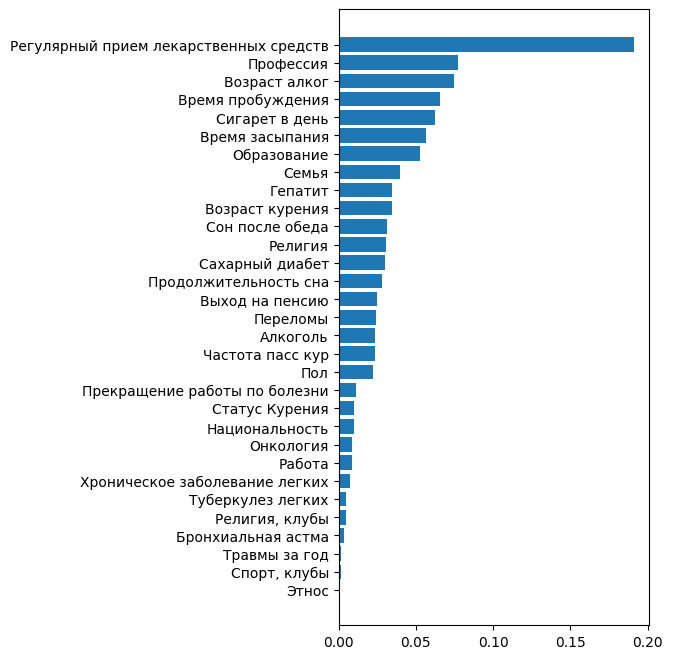

In [ ]:
plot_imp(arteria1, importance_dt)

Во всех случаях признак,наиболее влияющий на артериальную гипертензию :
* **Регулярный прием лекарственных средств**  
     


# Выводы
Добавив в модель больше информации, мы снизили качество на тестовой выборке для модели логистической регрессии (все значения метрик хоть и незначительно, но ухудшились). Для всех остальных моделей оценки улучшились. При этом по всем оценкам,  кроме специфичности, наилучшим алгоритмом оказалась логистическая регрессия.   

Все модели показали, что признак 'Регулярный прием лекарственных средств' влияет на наличие артериальной гипертензии у пациента.

**Лучшая модель из рассмотренных** – логистическая регрессия, которую обучали только на числовых признаках.

LogisticRegression(max_iter=500, random_state=42)

Accuracy = 0.7487

Balanced_accuracy=0.7511

Precision = 0.7071

Recall = 0.7865

F1_score = 0.7447

ROC AUC = 0.8066

PR AUC = 0.7607

Specificity = 0.7157

## Задание
1) Так же, как мы обучили модели для предсказания Артериальной гипертензии, обучите их для предсказания Сердечной недостаточности.

2) Подумайте, как улучшить модели (например, подобрав гиперпараметры, иначе закодировав категориальны признаки, иначе заполнив пропущенные значения, сгенерировав новые признаки, отбросив вредные/неважные признаки).

3) Какие признаки оказались наиболее важными в вашем случае? Изучите вклад признаков в решение.
